# 가설검정 연습문제

1개월간 측정한 빵의 평균 무게는 495.3g이었다. 이 값을 가지고 식빵의 무게가 500g이 되지 않는다며 베이커리를 찾아가 컴플레인을 해야 할까?

상품의 평균 무게가 500g 미만이라는 것은 단일 표본 T-Test에서 이미 검증된 것이라고 판단

>귀무가설($H_0$) : $\mu = 500$,
>대립가설($H_1$) : $\mu \neq 500$,
>대립가설($H_1$) : $\mu > 500$,
>대립가설($H_1$) : $\mu < 500$

## #01 데이터 준비

### 패키지

In [32]:
from pandas import read_excel
from scipy.stats import t
from matplotlib import pyplot as plt
import seaborn as sb
from math import sqrt
import sys
from scipy import stats

### 데이터 가져오기

In [33]:
df = read_excel("https://data.hossam.kr/E02/bread.xlsx")
df

,무게
0,495
1,496
2,502
3,494
4,499
5,501
6,493
7,494
8,495
9,501


## #02 신뢰구간 구하기

In [34]:
# 신뢰수준
# 95%의 신뢰구간을 생성
clevel = 0.95

# 샘플 크기
n = len(df['무게'])
n

# 자유도(degree of freedom)
dof = n-1
dof

# 표본 평균
sample_mean = df['무게'].mean()
sample_mean

# 표본 표준 편차
sample_std = df['무게'].std(ddof=1)
sample_std

# 표본 표준오차
sample_std_error = sample_std/sqrt(n)

# 신뢰구간
cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)
cmin, cmax

(494.03836792675105, 496.6949654065823)

## #03. 시각화

신뢰구간 시각화 이후 가설검정 결과를 제시

In [35]:
plt.rcParams['font.family']='AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams['font.size']=10
plt.rcParams['figure.figsize']=(7,4)
plt.rcParams['axes.unicode_minus']=False

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


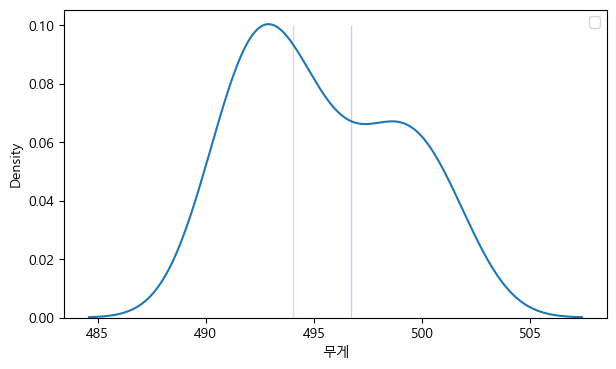

In [36]:
sb.kdeplot(data=df, x='무게')
# 신뢰구간 min 설정
sb.lineplot(x=[cmin,cmin], y=[0,0.1], color='red')
# 신뢰구간 max 설정
sb.lineplot(x=[cmax,cmax], y=[0,0.1], color='blue')
# -> 붉은선, 파란선 구간이 신뢰 구간 95% 지점
plt.legend()
plt.show()
plt.close()

### 결론

상품(빵)의 평균 무게의 신뢰구간은 494.04, 496.70으로 나타났다.

때문에 1개월간 측정한 빵의 평균 무게는 495.3g은 편균 무게의 신뢰구간에 부합하기 때문에 베이커리를 찾아가 컴플레인을 걸 수 없다.